In [77]:
import pandas as pd
import numpy as np
import os # doesnt have to be installed with pip

import seaborn as sns

In [217]:
df = pd.read_csv('data/Kickstarter_preprocessed.csv')

In [230]:
# delete first column
df.drop(['Unnamed: 0'],axis=1,inplace=True);

# rename some columns
df.rename(columns={'name_category':'category_sub','slug_category':'category','blurb':'description'},inplace=True)

In [212]:
#staff_pick -> Vorsicht!
## features to add
# subcategory
# category
# region, state, blub
df['desription'] = df['description'].apply(lambda x: len(str(x).split()))
df = df.eval('usd_goal = static_usd_rate * goal')
df['duration'] = df['deadline'] - df['launched_at']


In [225]:
# create function for format change
# we could also use lambda x: datetime.utcfromtimestamp(x)
from datetime import datetime

def chg_date(x):
    return datetime.utcfromtimestamp(x)

# apply on dataframe

time_col = ['created_at','deadline','state_changed_at','launched_at']
df[time_col] = df[time_col].applymap(chg_date)

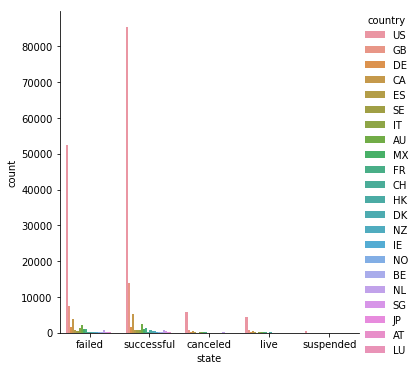

In [195]:
sns.catplot(data=df, x='state', hue='country', kind='count')

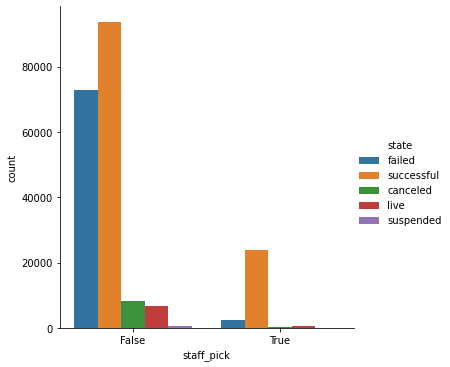

In [198]:
sns.catplot(data=df, x='staff_pick', hue='state', kind='count')

In [9]:
a = list(df.urls[:10])

In [51]:
a = list(df[df.blurb.str.contains('Nice Asses.').fillna(False)].urls)

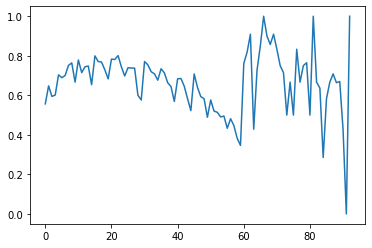

In [168]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(success_per_day)), success_per_day)

In [169]:
durations_list = sorted(list(df.duration_days.unique()))
duration_counts = df.duration_days.value_counts()

countries_list = list(df.country.unique())

In [174]:
def succes_per_feature(df, feature_list, feature_name):
    return [len(df.query('state in ["successful"] & @feature_name==@i'))/len(df.query('state in ["successful","failed"] & @feature_name==@i')) for i in feature_list]


success_per_day = [len(df.query('state in ["successful"] & duration_days==@i'))/len(df.query('state in ["successful","failed"] & duration_days==@i')) for i in durations_list]

success_per_country = [(len(df.query('state in ["successful"] & country==@i'))/len(df.query('state in ["successful","failed"] & country==@i')), i) for i in countries_list]
success_per_country = sorted(success_per_country, key= lambda x: x[0])

<AxesSubplot:xlabel='state', ylabel='count'>

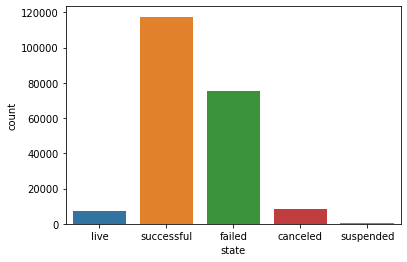

In [189]:
sns.countplot(data=df, x='state')

In [190]:
sns.catplot(x=success_per_country[1], y=success_per_country[0])

AttributeError: 'bool' object has no attribute 'all'

In [298]:
pledged_per_year_month = df.groupby(['start_year','start_month']).sum().usd_pledged
pledged_per_year = df.groupby(['start_year']).sum().usd_pledged

pledged_per_year

start_year
2009    8.153531e+05
2010    6.453170e+06
2011    2.318343e+07
2012    7.743207e+07
2013    1.907555e+08
2014    2.571229e+08
2015    3.591758e+08
2016    3.133357e+08
2017    4.364007e+08
2018    8.615519e+08
2019    1.710914e+08
Name: usd_pledged, dtype: float64

In [297]:
pledged_per_year_month.div(pledged_per_year)

start_year  start_month
2009        4              0.009364
            5              0.038186
            6              0.008141
            7              0.041377
            8              0.092624
                             ...   
2018        11             0.089181
            12             0.059908
2019        1              0.400362
            2              0.404747
            3              0.194890
Name: usd_pledged, Length: 120, dtype: float64

In [280]:
pledged_per_month_perc = pledged_per_year_month/

,start_year,usd_pledged
0,2009,8.153531e+05
1,2010,6.453170e+06
2,2011,2.318343e+07
3,2012,7.743207e+07
4,2013,1.907555e+08
5,2014,2.571229e+08
6,2015,3.591758e+08
7,2016,3.133357e+08
8,2017,4.364007e+08
9,2018,8.615519e+08


In [232]:
######### First feature engineering

# Replace short description of project with length of description
df['description'] = df['description'].apply(lambda x: len(str(x).split()))

# convert all goals into USD
df = df.eval('usd_goal = static_usd_rate * goal')

# create duration of project
df['duration'] = df['deadline'] - df['launched_at']
df['duration_days']=df['duration'].dt.days

# create year and month in which project ist started
df['start_month']= df['launched_at'].dt.month
df['start_year']= df['launched_at'].dt.year

# split text in column category, keep only left part of string --> main category
df.category = df.category.apply(lambda x: x.split('/')[0])

# change to lower case string
df.category_sub = df.category_sub.str.lower()